### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

* [Variables definition](#variables)
* [Hypotheses definition](#hypotheses)
* [Descriptive statistics](#descr) 
  * [Measure of central tendency](#centr)
  * [Measure of variability](#var)
* [Visualization](#viz)
* [Statistical test](#stats)
* [Optional](#opt)


<a id="variables"></a>

## **Variables**

**(1) What is the independent variable? What is the dependent variable?**

- An independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable. 
- A dependent variable is the variable being tested and measured in a scientific experiment.

source: (https://www.thoughtco.com/independent-and-dependent-variables-differences-606115)

So for our task:
- **An independent variable**  congruence/incongruence: if color of the ink is conguent to the word meaning
- **A depentent variable** time spent to say the word, is different for congruent and incongruent groups and depends on the ink color.

<a id="hypotheses"></a>

## **Hypotheses**

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

In order to understand what are the hypotheses for this task we need to have a look at the database:

In [137]:
# to import required libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# to read the dataset
df = pd.read_csv('./stroopdata.csv')

# to check dataset columns
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


$H_{0}$ *Null Hypothesis* μ1 = μ2    states that average reading time for congruent task. when color of text match the word meaning and incogruent task when color of the text is different from the word meaning is not different.

$H_{1}$ *Alternative Hypothesis* μ1 != μ2    states that average reading time for conguent task is different from average reading time for incongruent task.

<a id="descr"></a>

## **Descriptive statistics**

**(3) Report some descriptive statistics regarding this dataset.**

Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.


<a id="centr"></a>

**Measure of central tendency**

In [139]:
# to get some descriptive statistics about the dataset
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**Some of measure of central tendency are:**
- mean
- median
- mode
- interquartile mean - a truncated mean based on data within the interquartile range

In [140]:
# to calculate median for both groups
print('Congruent median: ', df['Congruent'].median())
print('Incongruent median: ', df['Incongruent'].median())

Congruent median:  14.3565
Incongruent median:  21.0175


In [141]:
# to calculate mode for congruent values
dfC = np.array(df['Congruent'])
congruentMode = stats.mode(dfC)


In [142]:
# to calculate mode for incongruent values
dfIn = np.array(df['Incongruent'])
incongruentMode = stats.mode(dfIn)
print('Incongruent Values Mode', incongruentMode)

Incongruent Values Mode ModeResult(mode=array([ 15.687]), count=array([1]))


In [143]:
# to calculate interquartile mean for `Congruent` group
conIntC = df.query('Congruent >= 11.895250 and Congruent <=16.200750')
print('Interquirtile mean for Congruent:', conIntC['Congruent'].mean())

Interquirtile mean for Congruent: 13.85075


In [144]:
# to calculate interquartile mean for `Incongruent` group
conIntI = df.query('Incongruent >= 18.716750 and Incongruent <=24.051500')
print('Interquirtile mean for Incongruent:', conIntI['Incongruent'].mean())

Interquirtile mean for Incongruent: 21.1418333333


In [145]:
print('Measure of central tendency:')
print('Congruent mean: ', df['Congruent'].mean())
print('Incongruent mean: ', df['Incongruent'].mean())
print('Congruent median: ', df['Congruent'].median())
print('Incongruent median: ', df['Incongruent'].median())
print('Congruent Values Mode', congruentMode)
print('Incongruent Values Mode', incongruentMode)
print('Interquirtile mean for Congruent:', conIntC['Congruent'].mean())
print('Interquirtile mean for Incongruent:', conIntI['Incongruent'].mean())

Measure of central tendency:
Congruent mean:  14.051125
Incongruent mean:  22.0159166667
Congruent median:  14.3565
Incongruent median:  21.0175
Congruent Values Mode ModeResult(mode=array([ 8.63]), count=array([1]))
Incongruent Values Mode ModeResult(mode=array([ 15.687]), count=array([1]))
Interquirtile mean for Congruent: 13.85075
Interquirtile mean for Incongruent: 21.1418333333


<a id="var"></a>

**Measure of variability**

In [146]:
# import libraries to calculate interqurtile range

from scipy.stats import iqr

In [147]:
# to calculate range for `Congruent` group

print('Range for Congruent:', df['Congruent'].max()-df['Congruent'].min())

Range for Congruent: 13.698


In [148]:
# to calculate range for `Incongruent` group

print('Range for Incongruent:', df['Incongruent'].max()-df['Incongruent'].min())

Range for Incongruent: 19.568


In [149]:
# to calculate interquartile range for `Congruent` group
print('Interquartile range for Congruent:', iqr(dfC))

Interquartile range for Congruent: 4.3055


In [150]:
# to calculate interquartile range for `Incongruent` group

print('Interquartile range for Incongruent:', iqr(dfIn))

Interquartile range for Incongruent: 5.33475


**The standard deviation**

In [151]:
# to identify standard deviation for both groups
print('Standard deviation congruent', df['Congruent'].std())
print('Standard deviation incongruent', df['Incongruent'].std())

Standard deviation congruent 3.55935795765
Standard deviation incongruent 4.79705712247


**The variance for both groups:**

In [152]:
# to identify variance for both groups
print('Variance congruent', df['Congruent'].var())
print('Variance incongruent', df['Incongruent'].var())

Variance congruent 12.6690290707
Variance incongruent 23.0117570362


<a id="viz"></a>

## **Visualization**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

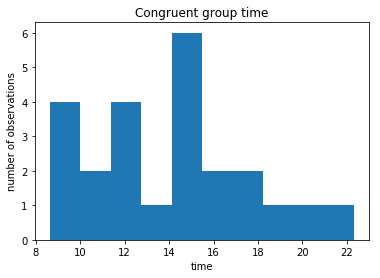

In [153]:
# Build the visualizations here

#Visualisation for `Congruent` group
plt.hist(df['Congruent'])
plt.title('Congruent group time')
plt.xlabel('time')
plt.ylabel('number of observations')
plt.show()

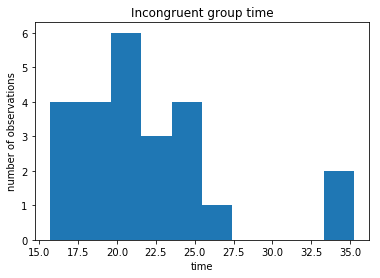

In [154]:
# Build the visualizations here

plt.hist(df['Incongruent'])
plt.title('Incongruent group time')
plt.xlabel('time')
plt.ylabel('number of observations')
plt.show()

Text(0,0.5,'Incongruent')

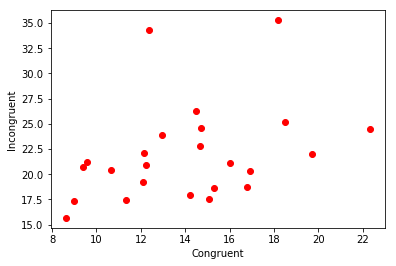

In [155]:
# to demonstrate relationships between two groups by scatter plot
plt.scatter(df['Congruent'], df['Incongruent'], color = 'red');
plt.xlabel('Congruent')
plt.ylabel('Incongruent')



To check if there is a correlation between `Congruent` and `Incongruent`

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


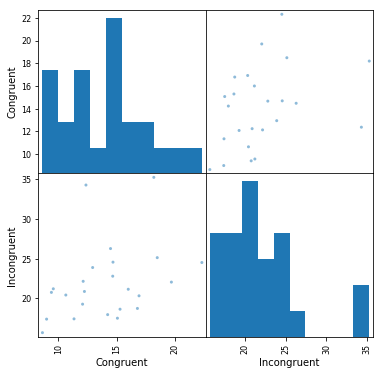

In [156]:
# to view correlations graphically as a scatter matrix

pd.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [157]:
# to calculate correlation matrix
df.corr()

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


As we see from histograms, scatter-plots and correlation matrix:
- the correlation between `Incongruent` and `Congruent` is week
- the most often reaction for `Incongruent` is around 20 min (20-21 min)
- the most often reaction for `Congruent` is around 15 min (14-16 min)
- both histograms are right skewed with outliers.



We'll calculate the difference between both groups to check if it is significant

In [158]:
# to calculate a difference in means between `Congruent` and `Incongruent`

diff_mean = df['Incongruent'].mean() - df['Congruent'].mean()
diff_mean

7.9647916666666667

In [159]:
# to calculate additional column with difference between `Congruent` and `Incongruent`

df['Diffs'] = df['Incongruent'] - df['Congruent']
df['Diffs']

0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
Name: Diffs, dtype: float64

In [160]:
# to calculate how much `Incongruent` time is longer/shorter than `Congruent` time

df['DiffsProp'] = (df['Incongruent'] - df['Congruent'])/df['Congruent']
df['DiffsProp']

0     0.595993
1     0.116134
2     1.218110
3     0.817729
4     0.554503
5     0.705998
6     0.672475
7     0.935462
8     1.208488
9     0.815055
10    0.098352
11    0.218721
12    0.161680
13    0.200898
14    0.937088
15    0.826711
16    0.359232
17    0.920199
18    0.536054
19    1.772092
20    0.845952
21    0.261856
22    0.119127
23    0.321982
Name: DiffsProp, dtype: float64

In [161]:
# to check descriptive statistics of a new column `Diffs`
df['Diffs'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Diffs, dtype: float64

In [162]:
# to print measure of central tendency
print("Mean of the difference:", df['Diffs'].mean())

# to print measure of variability
print("Standard deviation of the differences: ", df['Diffs'].std())

Mean of the difference: 7.96479166667
Standard deviation of the differences:  4.86482691036


- We see that time for `Incongruent` group is significantly longer than time for `Congruent` group.
In many cases more than by 50%
- Mean difference is 7.9648
- Standard defition of difference 4.8648

<a id="stats"></a>

## **Statistical test**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [163]:
# Perform the statistical test here
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In order to check the whole population, we'll use bootstraping method.
It would allow us to plot histogram of population's means and see how it is distributed,
in order to be able to make a decision about statistical test.

In [164]:
# bootstrap sampling in order to calculate means' distribution
diffs = []

for _ in range(10000):
    sample = df.sample(24, replace = True)
    in_mean = sample.Incongruent.mean()
    con_mean = sample.Congruent.mean()
    diffs.append(in_mean - con_mean)

# to convert to np array
diffs = np.array(diffs)

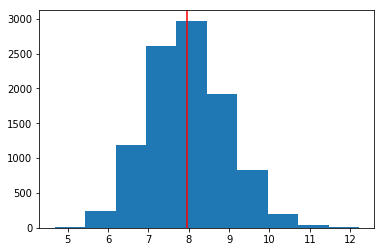

In [165]:
# to plot distribution of population means
plt.hist(diffs);
plt.axvline(diff_mean, color='red');


Actual observed difference mean is 7.9648, shown by red vertical lane, and we see it's in the middle of the distribution.
On this plot we see normal distribution.

In [166]:
# to calculate p-value
(diffs > diff_mean).mean()

0.48880000000000001

In [167]:
# population mean
diffs.mean()

7.968782366666666

If p-value is less than alpha, we have to reject Null Hypothesis, in favor of  Alternative Hypothesis. 

We also could use confidence interval to check if our observed mean falls into 95% of bootstrapped means.

In [168]:
# tp calculate confidence intervals between 2.5% and 97.% for bootstrapped means
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)


(6.1844187500000016, 9.9249239583333306)

If the P value is less than alpha, the confidence interval will not contain the null hypothesis value. So we have to reject Null Hypothesis

In [169]:
# by default, numpy.std returns the population standard deviation, 
# we are looking for the sample standard deviation, we hav to supply an optional ddof parameter to std():

np.std(df['Congruent'], ddof=1)

3.5593579576451955

In [170]:
# standard deviation for `Incongruent` sample
np.std(df['Incongruent'], ddof=1)

4.7970571224691376

In [171]:
# to calculate standard deviation bootstrapped means:
print('Standard deviation bootstrapped', diffs.std())


Standard deviation bootstrapped 0.966129484177


Now we have to make a decision about the statistical test.
I'd like to check t_value. 


This test checks if the means of two samples are significantly different.

H0: the means of the samples are equal.

H1: the means of the samples are unequal.

In [172]:
# to find our two tailed critical values
# we need two values for that
# The alpha level: given as 5% in the question.
# The degrees of freedom, which is the number of items in the sample (n) minus 1: 24 – 1 = 23
print(stats.t.ppf(1-0.025, 23))

2.06865761042


This critical value means is that we would expect most values to fall between -2.0686 and 2.0686. If our calculated t-value falls within this range, the null hypothesis is likely true.

Let's calculate t-value


For that calculation we need:
    
- The sample mean(x̄). 

- The population mean(μ). These two are calculated in df['Diffs].mean()
- The sample standard deviation(s) 4.8648
- Number of observations(n) = 24.

Insert numbers into formula:


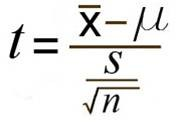

In [173]:
#t_value = df['Diffs'].mean()/(sample std / sqrt(n))
t_value = df['Diffs'].mean()/(4.8648/np.sqrt(24))
t_value

8.0207513118339637

In [174]:
# we can confirm this t_value calculation by using ttes_rel method
# from scipy.stats import ttest_rel

stat, p = stats.ttest_rel(df['Incongruent'],df['Congruent'],axis=0)
stat, p

(8.020706944109957, 4.1030005857111781e-08)

As we see our t_value 8.02 doesn't fall into interval of t-critical values (-0.2686, 2.0686) Sp we have to reject Null Hypothesis

## Conclusions:

- both p-value and t_value confirms that with Type-I error 5% we have to reject Null Hypothesis which states that means of `Congruent` and `Incongruent` groups are the same
- we reject Null Hypothesis in favor of Althernative Hypothesis: the means of `Congruent` and `Incongruent` groups are different
- as we see from the column `Diffs` it takes significantly longer time to read word in `Incongruent` group, our observation in this column were confirmed by p-value and t-value

<a id ="opt"></a>

## **Optional**

(6) Optional: 

**What do you think is responsible for the effects observed?**
- as we see from column `Diffs` and p-value and t-value it takes significantly longer time to read mismatched words.

**Can you think of an alternative or similar task that would result in a similar effect?**
I think some examples could include:
- saying the word meaning one movement but doing another, like saying "forward" and "going back", saying "no" and nodding head. 
- also could include mismatched shapes, fruits, feelings.

**Some research about the problem will be helpful for thinking about these two questions!**

https://www.verywellmind.com/what-is-the-stroop-effect-2795832

https://www.nature.com/articles/s41598-017-18185-1